# Adenovirus Disease Prediction for Child Healthcare Using Machine Learning

This work focuses on developing a machine learning model for early detection of Adenovirus infections using individual health parameters. The goal is to provide a user-friendly, preventive tool that can reduce reliance on physical examinations—especially useful in rural areas with limited healthcare access. By targeting children, who are most affected, the model aims to support health awareness, resource allocation, and outbreak prevention.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Adenoviruses_Dataset.csv to Adenoviruses_Dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('Adenoviruses_Dataset.csv')

pd.set_option('display.max_columns', None)

print(df.head())

  Breathing Problem Pink Eye Pneumonia  Fever Acute Gastroenteritis   \
0               Yes      Yes        Yes   Yes                    Yes   
1               Yes      Yes        Yes   Yes                    Yes   
2               Yes      Yes        Yes   Yes                     No   
3               Yes      Yes        Yes   Yes                    Yes   
4               Yes      Yes        Yes   Yes                    Yes   

  Dry Cough Sore throat Bladder Infection Adenoviruses  
0       Yes         Yes                No          Yes  
1       Yes         Yes               Yes          Yes  
2       Yes         Yes               Yes          Yes  
3       Yes          No               Yes          Yes  
4       Yes         Yes                No          Yes  


In [ ]:
df.shape

(5434, 9)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Breathing Problem       5434 non-null   object
 1   Pink Eye                5434 non-null   object
 2   Pneumonia               5434 non-null   object
 3   Fever                   5434 non-null   object
 4   Acute Gastroenteritis   5434 non-null   object
 5   Dry Cough               5434 non-null   object
 6   Sore throat             5434 non-null   object
 7   Bladder Infection       5434 non-null   object
 8   Adenoviruses            5434 non-null   object
dtypes: object(9)
memory usage: 382.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

df['Breathing Problem']=e.fit_transform(df['Breathing Problem'])
df['Pink Eye']=e.fit_transform(df['Pink Eye'])
df['Pneumonia ']=e.fit_transform(df['Pneumonia '])
df['Fever']=e.fit_transform(df['Fever'])
df['Acute Gastroenteritis ']=e.fit_transform(df['Acute Gastroenteritis '])
df['Dry Cough']=e.fit_transform(df['Dry Cough'])
df['Sore throat']=e.fit_transform(df['Sore throat'])
df['Bladder Infection']=e.fit_transform(df['Bladder Infection'])
df['Adenoviruses']=e.fit_transform(df['Adenoviruses'])

print(df.head())

   Breathing Problem  Pink Eye  Pneumonia   Fever  Acute Gastroenteritis   \
0                  1         1           1      1                       1   
1                  1         1           1      1                       1   
2                  1         1           1      1                       0   
3                  1         1           1      1                       1   
4                  1         1           1      1                       1   

   Dry Cough  Sore throat  Bladder Infection  Adenoviruses  
0          1            1                  0             1  
1          1            1                  1             1  
2          1            1                  1             1  
3          1            0                  1             1  
4          1            1                  0             1  


In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Pink Eye,Pneumonia,Fever,Acute Gastroenteritis,Dry Cough,Sore throat,Bladder Infection,Adenoviruses
Breathing Problem,1.000000,1.000000,1.000000,0.089903,0.066688,0.159562,0.303768,0.075318,0.443764
Pink Eye,1.000000,1.000000,1.000000,0.089903,0.066688,0.159562,0.303768,0.075318,0.443764
Pneumonia,1.000000,1.000000,1.000000,0.089903,0.066688,0.159562,0.303768,0.075318,0.443764
Fever,0.089903,0.089903,0.089903,1.000000,0.002252,0.127580,0.322235,0.073953,0.352891
Acute Gastroenteritis,0.066688,0.066688,0.066688,0.002252,1.000000,0.086176,0.079055,0.020941,0.119755
Dry Cough,0.159562,0.159562,0.159562,0.127580,0.086176,1.000000,0.213907,0.086843,0.464292
Sore throat,0.303768,0.303768,0.303768,0.322235,0.079055,0.213907,1.000000,0.081377,0.502848
Bladder Infection,0.075318,0.075318,0.075318,0.073953,0.020941,0.086843,0.081377,1.000000,0.089930
Adenoviruses,0.443764,0.443764,0.443764,0.352891,0.119755,0.464292,0.502848,0.089930,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

x=df.drop('Adenoviruses',axis=1)
y=df['Adenoviruses']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

# Logistic Regression

In [ ]:
model = LogisticRegression()
# Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Score/Accuracy
acc_logreg = model.score(x_test, y_test)*100
print(acc_logreg)

91.62833486660533


# Decision Tree Classifier

In [ ]:
t = tree.DecisionTreeClassifier()
t.fit(x_train,y_train)
y_pred = t.predict(x_test)
#Score/Accuracy
acc_decisiontree=t.score(x_test, y_test)*100
print(acc_decisiontree)

93.92824287028519


# Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100)
#Fit
model.fit(x_train, y_train)
#Score/Accuracy
acc_randomforest=model.score(x_test, y_test)*100
print(acc_randomforest)

93.92824287028519


# K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#Score/Accuracy
acc_knn=knn.score(x_test, y_test)*100
print(acc_knn)

93.46826126954922


# Gaussian Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)
#Score/Accuracy
acc_gaussian= model.score(x_test, y_test)*100
print(acc_gaussian)

87.02851885924562


# Support Vector Machine (SVM)

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)
#Score/Accuracy
acc_svc=clf.score(x_test, y_test)*100
print(acc_svc)

92.27230910763569


In [ ]:
models = pd.DataFrame({
	'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 'Naive Bayes', 'Support Vector Machines'],
	'Score': [acc_logreg, acc_decisiontree, acc_randomforest, acc_knn, acc_gaussian, acc_svc]})
print(models.sort_values(by='Score', ascending=False))

                      Model      Score
1  Decision Tree Classifier  93.928243
2  Random Forest Classifier  93.928243
3                       KNN  93.468261
5   Support Vector Machines  92.272309
0       Logistic Regression  91.628335
4               Naive Bayes  87.028519


# The two best models are Decision Tree and K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

acc_knn=knn.score(x_test, y_test)
print(f"Accuracy: {acc_knn:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 93.47
Precision: 0.94
Recall: 0.98


True Positives (TP): 847
True Negatives (TN): 169
False Positives (FP): 55
False Negatives (FN): 16


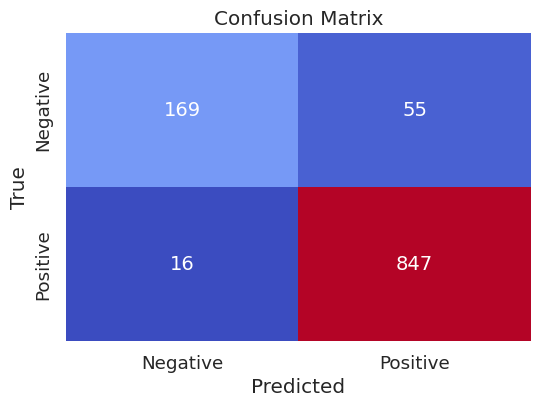

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = conf_matrix.ravel()

sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            annot_kws={"size": 14},
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

plt.show()

In [ ]:
t = DecisionTreeClassifier()
t.fit(x_train, y_train)
y_pred = t.predict(x_test)

acc_decisiontree = t.score(x_test, y_test)
print(f"Accuracy: {acc_decisiontree:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")


Accuracy: 0.94
Precision: 0.93
Recall: 0.99


True Positives (TP): 857
True Negatives (TN): 164
False Positives (FP): 60
False Negatives (FN): 6


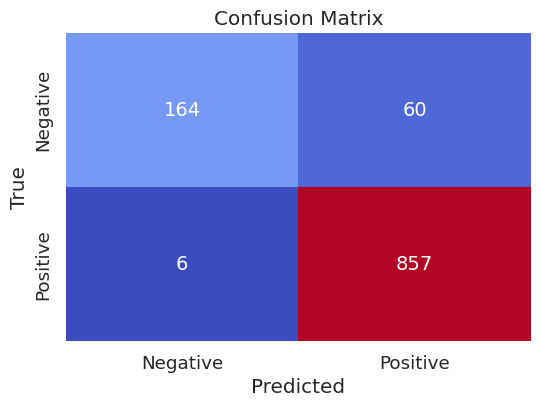

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = conf_matrix.ravel()

sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            annot_kws={"size": 14},
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

plt.show()

# Both Accuracy & Recall are higher for Decision Tree Classifier hence it is the best model to predict presence of Adenovirus.

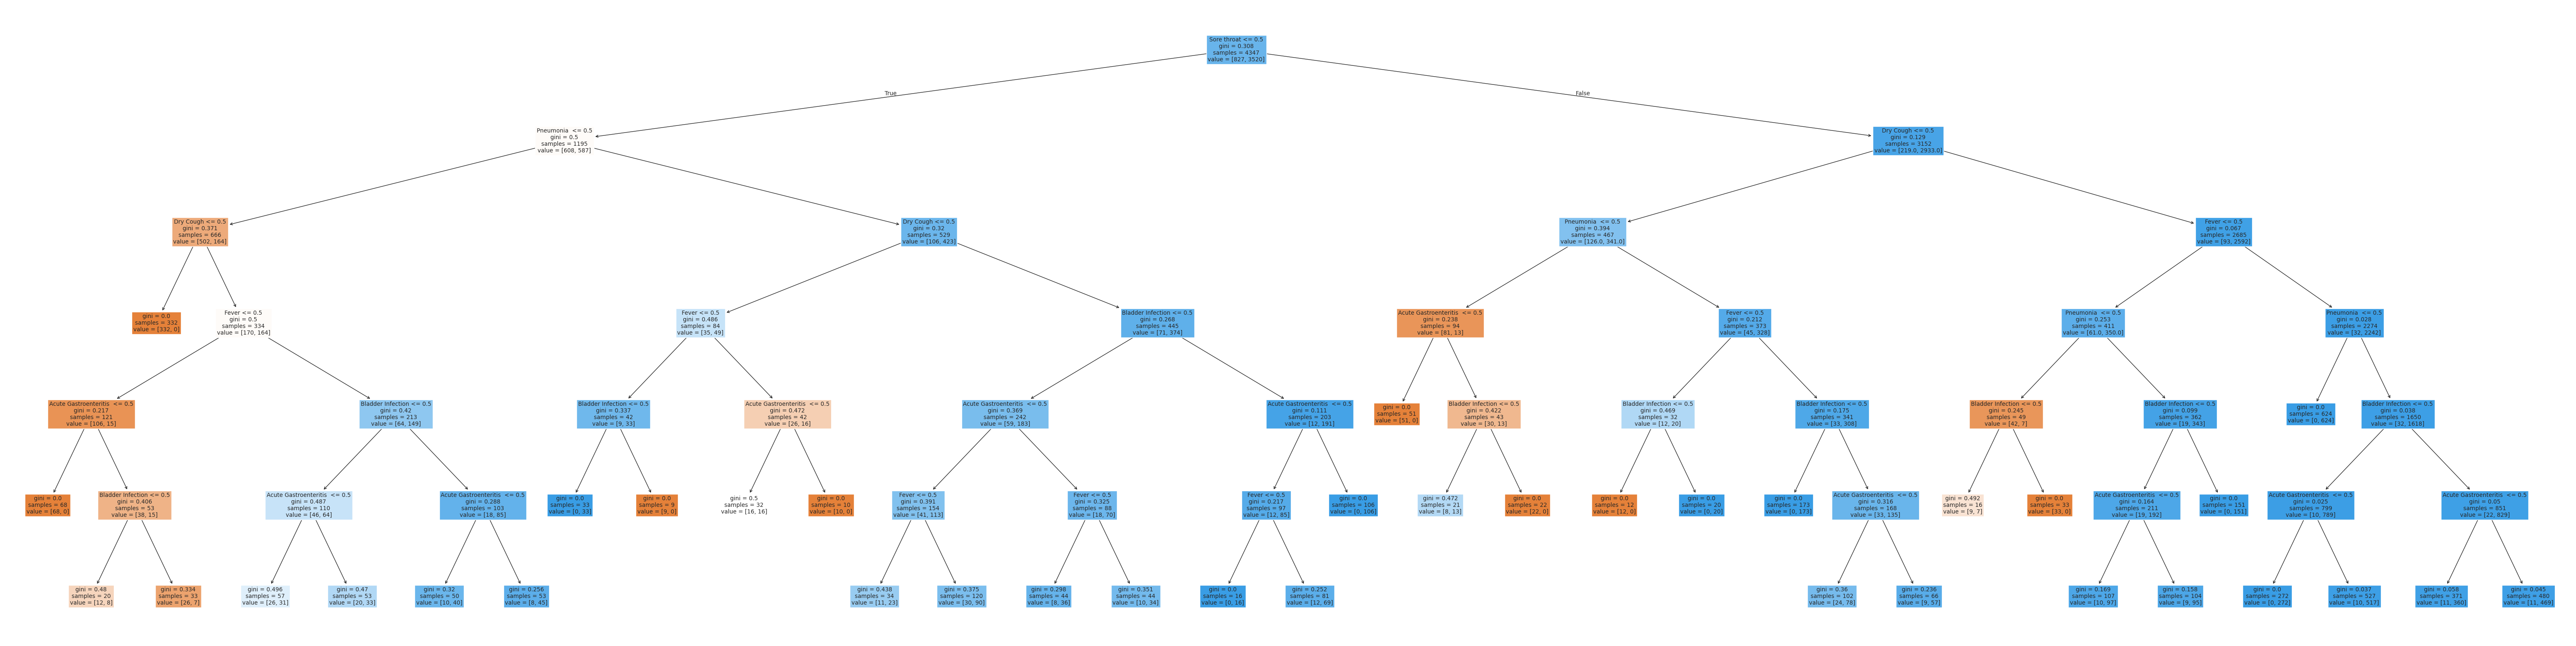

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

t = DecisionTreeClassifier()
t.fit(x_train, y_train)
y_pred = t.predict(x_test)

plt.figure(figsize=(80, 20))
plot_tree(t, feature_names=x_train.columns.tolist(), max_depth=10, filled=True)
plt.show()


In [ ]:
t.tree_.max_depth

6

In [ ]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': t.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head()

,feature,importance
6,Sore throat,0.354293
2,Pneumonia,0.338197
5,Dry Cough,0.141558
3,Fever,0.080578
7,Bladder Infection,0.068187


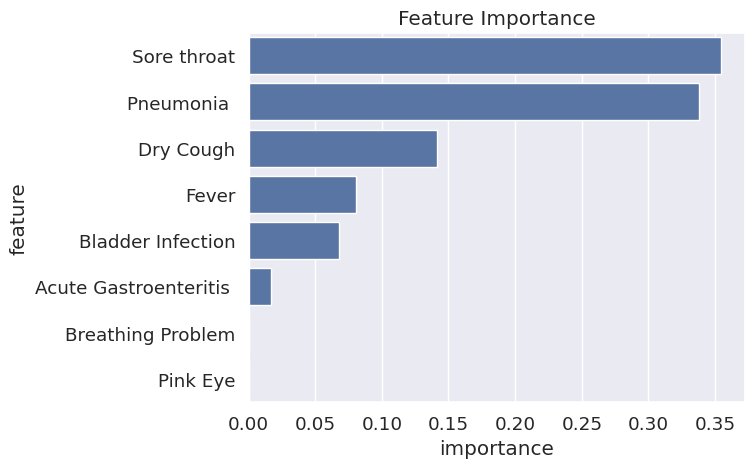

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
import joblib

In [ ]:
model_filename = 'decision_tree_model.joblib'
joblib.dump(t, model_filename)

['decision_tree_model.joblib']

In [ ]:
loaded_model = joblib.load(model_filename)

In [ ]:
y_pred_loaded = loaded_model.predict(x_test)

In [ ]:
y_pred_loaded

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.download("decision_tree_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>